# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [17]:
!pip install numpy
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Import the core data science libraries:

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [68]:
# importing each json file into a dataframe
df1 = pd.read_json('data/StreamingHistory_music_0.json')
df2 = pd.read_json('data/StreamingHistory_music_1.json')

# merging two dataframes, ignore_index re-indexes the combined dataFrame
df = pd.concat( [df1, df2], ignore_index=True)

## Data inspection

 Show 5 rows, selected at random, from the data set.

In [24]:
df.sample(5)

,endTime,artistName,trackName,msPlayed
11326,2023-11-01 23:47,Fousheé,unexplainable,99840
4231,2023-04-20 19:55,Larry June,89 Earthquake,8570
9651,2023-09-25 05:52,Thundercat,3AM,1237
14997,2024-02-11 02:47,Rawayana,Caney,230187
13394,2023-12-20 17:35,The 1975,Heart Out,202293


Show each of the column names and their data types.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15180 entries, 0 to 15179
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     15180 non-null  object
 1   artistName  15180 non-null  object
 2   trackName   15180 non-null  object
 3   msPlayed    15180 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 474.5+ KB


Show any unique features of your chosen data set.

In [33]:
df.describe()

,msPlayed
count,15180.000000
mean,118592.802108
std,103561.358600
min,0.000000
25%,8467.500000
50%,113566.000000
75%,202199.000000
max,752044.000000


## Data munging

Using `to_datetime` function to convert `endTime` column from `object` Dtype to a `datetime` Dtype

In [80]:
df['endTime'] = pd.to_datetime(df['endTime'])
df.sample(5)

,endTime,artistName,trackName,msPlayed,sPlayed,minsPlayed,streamDuration,year,month,day,hour,dayOfWeek
668,2023-02-22 01:37:00,Plan B,Candy,207626,207.63,3.46,medium,2023,2,22,1,Wednesday
2832,2023-03-22 07:41:00,Juan Luis Guerra 4.40,Bachata Rosa,257080,257.08,4.28,medium,2023,3,22,7,Wednesday
3077,2023-03-27 19:26:00,Drake,Summers Over Interlude,106333,106.33,1.77,short,2023,3,27,19,Monday
8266,2023-08-03 01:29:00,Bad Bunny,Me Porto Bonito,1578,1.58,0.03,skip,2023,8,3,1,Thursday
13502,2023-12-21 17:48:00,Calle 13,Electro Movimiento,1393,1.39,0.02,skip,2023,12,21,17,Thursday


No missing data found.

In [196]:
bad_rows = df[ df.isnull().any(axis=1) ]
bad_rows.head(3)

,endTime,artistName,trackName,msPlayed,sPlayed,minsPlayed,streamDuration,year,month,day,hour,dayOfWeek


Currently, this dataset tells us how long I streamed tracks in milliseconds with the `msPlayed` field. For our analysis, I will be creating new rows that convert this metric into seconds and minutes.

Additionally, I decided to create a `streamDuration` field that gives us a clearer picture of how long each track was streamed. This field categorizes streaming duration into these categories - skip', 'short', 'medium', and 'long'. The category boundaries are established on my own listening habits.

In [81]:
df['sPlayed'] = (df['msPlayed'] / 1000).round(2)
df['minsPlayed'] = (df['msPlayed'] / 60000).round(2)

bins = [0,40,120,300]
duration = ['skip', 'short', 'medium', 'long']
df['streamDuration'] = pd.cut(df['sPlayed'], [0,40,120,300,df['sPlayed'].max()], labels = duration, include_lowest=True)

df.sample(5)

,endTime,artistName,trackName,msPlayed,sPlayed,minsPlayed,streamDuration,year,month,day,hour,dayOfWeek
7671,2023-07-05 15:36:00,ROSALÍA,TUYA,154524,154.52,2.58,medium,2023,7,5,15,Wednesday
3973,2023-04-13 02:51:00,YNW Melly,Suicidal,37380,37.38,0.62,skip,2023,4,13,2,Thursday
13068,2023-12-14 16:59:00,Frank Ocean,Crack Rock,2154,2.15,0.04,skip,2023,12,14,16,Thursday
1263,2023-02-28 17:39:00,Aviad,the best in me,84486,84.49,1.41,short,2023,2,28,17,Tuesday
8396,2023-08-10 23:39:00,Toro y Moi,Magazine,191525,191.52,3.19,medium,2023,8,10,23,Thursday


Extracting date and time components and creating new columns for them

In [300]:
df['year'] = df['endTime'].dt.year
df['month'] = df['endTime'].dt.month_name()
df['day'] = df['endTime'].dt.day
df['hourEST'] = df['endTime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern').dt.hour

df['dayOfWeek'] = df['endTime'].dt.day_name()  
df.sample(5)

,endTime,artistName,trackName,msPlayed,sPlayed,minsPlayed,streamDuration,year,month,day,hour,dayOfWeek,hourEST
7445,2023-06-24 17:13:00,Shay Lia,SOLO,182400,182.40,3.04,medium,2023,June,24,17,Saturday,13
4260,2023-04-20 23:00:00,Frank Ocean,Cayendo (Side A - Acoustic),202199,202.20,3.37,medium,2023,April,20,23,Thursday,19
12852,2023-12-10 08:43:00,Larry June,Smoothies In 1991,14973,14.97,0.25,skip,2023,December,10,8,Sunday,3
4736,2023-04-29 15:04:00,Blood Orange,Out Of Your League,140923,140.92,2.35,medium,2023,April,29,15,Saturday,11
7022,2023-06-11 01:36:00,Joe Arroyo,Rebelión,287893,287.89,4.80,medium,2023,June,11,1,Sunday,21


## Data analysis

### Calculate Total Streams, Skips, and Skip Stream Rate

In [185]:
TotalStreams = df['artistName'].count()
TotalSkips = df[df['streamDuration'] == 'skip']['artistName'].count()
Rate = TotalSkips/TotalStreams

print(f'Total Number of Streams: {TotalStreams}')
print(f'Total Number of Skips: {TotalSkips}')
print(f'Skip Stream Rate: {Rate.round(2)}')
print(f'\n{(Rate*100).round()}% of the songs I streamed in the past year were skipped')

Total Number of Streams: 15180
Total Number of Skips: 5377
Skip Stream Rate: 0.35

35.0% of the songs I streamed in the past year were skipped


### Find the Day of the Week with Most Streamed Minutes

In [186]:
minsByDay= df.groupby("dayOfWeek")["minsPlayed"].sum()
maxDay = minsByDay.idxmax()
maxMinsDay = minsByDay.max()

print(f"The day with the most streamed minutes is {maxDay} with {maxMinsDay} minutes, or {(maxMinsDay/60).round(2)} hours.")

The day with the most streamed minutes is Wednesday with 5163.97 minutes, or 86.07 hours.


### My Top 10 Most Streamed Artists by Minutes

In [187]:
df.groupby("artistName")['minsPlayed'].sum().sort_values(ascending = False).head(10)

artistName
Daniel Caesar         1113.40
Blood Orange          1038.44
ROSALÍA                880.88
Kali Uchis             825.55
Frank Ocean            732.28
Daft Punk              630.04
Bad Bunny              540.13
Shakira                539.90
Tyler, The Creator     494.80
The 1975               448.46
Name: minsPlayed, dtype: float64

### My Top Streaming Month by Minutes, and My Top Artist and Song of the Month 

In [193]:
minsByMonth = df.groupby("month")['minsPlayed'].sum()
maxMonth = minsByMonth.idxmax()
maxMins = minsByMonth.max()

dfmaxMonth= df[df['month'] == maxMonth]
topArtist = dfmaxMonth.groupby('artistName')['minsPlayed'].sum().idxmax()
topSong = dfmaxMonth.groupby('trackName')['minsPlayed'].sum().idxmax()
topSongArtist = df[df['trackName'] == topSong]['artistName'].iloc[0]

print(f"The month with the most streamed minutes is {maxMonth} with {maxMins} minutes, or {(maxMins/60).round(2)} hours.")
print(f"Top Artist of {maxMonth}: {topArtist}")
print(f"Top Song of {maxMonth}: '{topSong}' by {topSongArtist}")



The month with the most streamed minutes is February with 4432.68 minutes, or 73.88 hours.
Top Artist of February: Blood Orange
Top Song of February: 'Champagne Coast' by Blood Orange


### Top Song of Each Month

In [288]:
songsMonthly = df.groupby(['month','trackName','artistName'])['minsPlayed'].sum()
maxSongIndex = songsMonthly.groupby('month').idxmax()
topSongsMonthly= songsMonthly.loc[maxSongIndex]

monthOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
topSongsMonthly = topSongsMonthly.loc[monthOrder]

print("Top Song of Each Month:")
print(topSongsMonthly)

Top Song of Each Month:
month      trackName                          artistName          
January    Fantastic Man                      William Onyeabor         28.62
February   Champagne Coast                    Blood Orange            105.94
March      Let Me Go                          Daniel Caesar           112.24
April      SORRY NOT SORRY                    Tyler, The Creator       59.19
May        Right Before My Eyes - Unpeeled    Cage The Elephant        50.39
June       Me and My Bitch - 2005 Remaster    The Notorious B.I.G.     35.72
July       mañana                             Tainy                    36.50
August     Breakout                           N.E.R.D                  42.19
September  Linger                             The Cranberries          37.72
October    Veridis Quo                        Daft Punk                70.43
November   MISS YOU SO                        rallen                   21.71
December   Empire Ants (feat. Little Dragon)  Gorillaz        

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### Skip rates throughout the day

<Axes: xlabel='hourEST', ylabel='Skip Rate'>

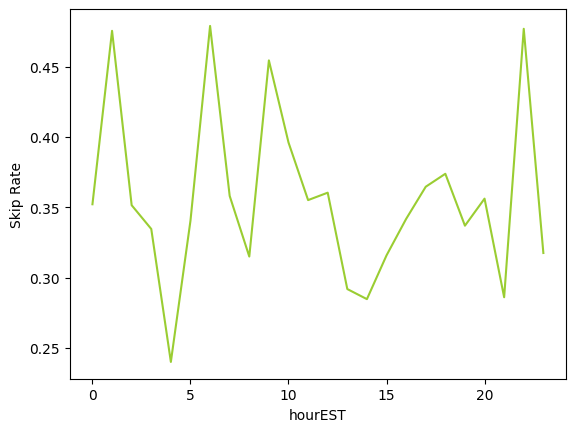

In [335]:

TotalStreamsHourly = df.groupby('hourEST')['artistName'].count()
TotalSkipsHourly = df[df['streamDuration'] == 'skip'].groupby('hourEST')['artistName'].count()

# calculates all the skip rates for each hour in EST
Rate = TotalSkipsHourly/TotalStreamsHourly

Rate.plot(ylabel = 'Skip Rate', color = 'yellowgreen')

### Monthly Distribution of Total Streaming 

<Axes: xlabel='month', ylabel='Total Hours Streamed'>

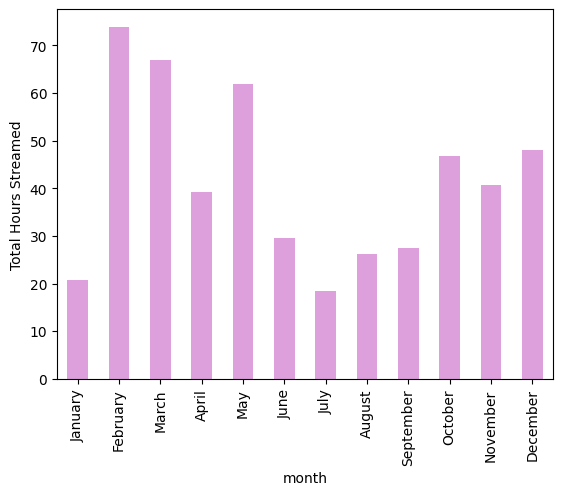

In [395]:
minsByMonth = df.groupby("month")['minsPlayed'].sum()/60
monthOrder = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered = minsByMonth.loc[monthOrder]
ordered.plot.bar(color = 'plum', ylabel= 'Total Hours Streamed')

### Top 10 Artists in the Past Year 

<Axes: ylabel='minsPlayed'>

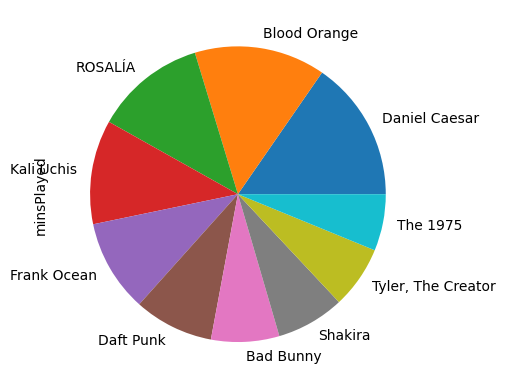

In [294]:
top10 = df.groupby("artistName")['minsPlayed'].sum().sort_values(ascending = False).head(10)
top10.plot.pie(y='artistName')

### Total Streaming Minutes by Stream Duration and EST Hour

/var/folders/dt/npwm56kx383b7_d7m4gcvwch0000gn/T/ipykernel_84218/3583198981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  streamingHourlyAndDuration = df.groupby(['hourEST', 'streamDuration'])['minsPlayed'].sum()


<Axes: xlabel='hourEST', ylabel='Total Streaming in minutes'>

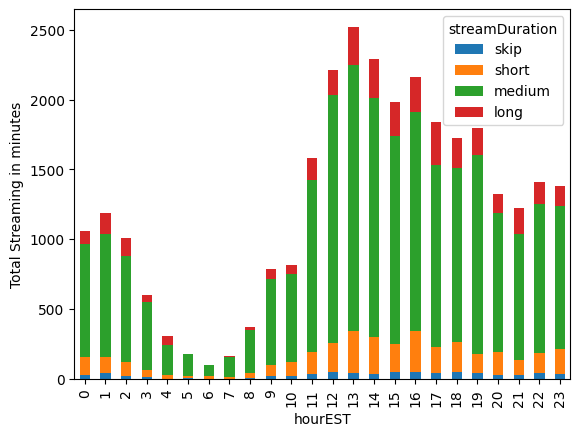

In [396]:
streamingHourlyAndDuration = df.groupby(['hourEST', 'streamDuration'])['minsPlayed'].sum()
streamingHourlyAndDuration = streamingHourlyAndDuration.unstack()

streamingHourlyAndDuration.plot.bar(stacked=True, ylabel = 'Total Streaming in minutes')

<Axes: xlabel='Total Streaming Duration in Hours', ylabel='trackName'>

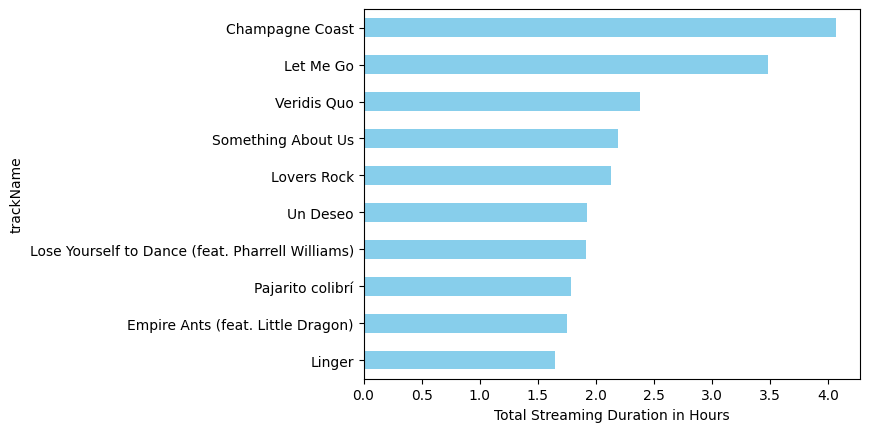

In [413]:
TrackStreamsHours = df.groupby('trackName')['minsPlayed'].sum()/60
TopSongs = TrackStreamsHours.sort_values(ascending=True).tail(10)

TopSongs.plot.barh(color='skyblue', xlabel = 'Total Streaming Duration in Hours')

